# Lab-1.1: Numerical optimization

*Author:* J. Hickman

* In this lab we will code the gradient-descent algorithm for numerical gradient based optimization 
* This algorithm is *extremely important*, it is the corner-stone of all modern Neural network training (from a MLP trained on MNIST to GPT3)
* If you are interested in Deep learning, then it is essential to understand.
* Training a supervised parametric regression model is essentially the multi-variable optimization of a scalar field, known as the loss function. 
$$L=L(\mathbf w)=L(w_0,w_1,w_2 ... w_N)$$
* We will use "w" as the dependent variable, because the inputs to the loss functions of the model parameters, often called weights (w) of the model
* The local or global minima or maxima of  $L$ satisfy the condition $\mathbf \nabla L(\mathbf w) = 0$ where $$\mathbf \nabla L(\mathbf w)=(\frac{\partial L}{\partial w_0},\frac{\partial L}{\partial w_1} \dots \frac{\partial L}{\partial w_N})$$ is the gradient, i.e. the vector of partial derivatives. 
* **IMPORTANT: In this lab, we won't actually focus on training a model, instead we will just focus on minimizing some simple mathematical functions**
* The most common form of numerical optimizers are "gradient based" methods. 
* Such methods  "follow" the gradient, i.e. the vector of partial derivatives, 'downhill' into local minima in the optimization space. 
* Therefore in this lab we focus on some fundamental concepts associated with numerical optimization, including numerical derivatives, solvers, and optimizers. 

**Instructions** 
* [click here to download the notebook]()
* Read and work through all tutorial content and do all exercises below
  
**Submission:**
* You need to upload ONE document to Canvas when you are done
  * (1) A PDF (or HTML) of the completed form of this notebook 
* The final uploaded version should NOT have any code-errors present 
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

### Import packages 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from   scipy.optimize import minimize

## Demonstration: Sci-py optimizer (1D)

We saw the Sci-py minimizer in Anly-501, but as a refresher lets take another quick look.

### Define our objective function: 
* i.e the function we want to optimize
* We will call it L because in regression this will be our loss function
* We will use "w" as the dependent variable because the inputs to the loss functions of the model parameters, often called weights (w) of the model

In [2]:
num_eval=0
i_write=True
def L1(w_i):
	# OUTPUT
	out=(w_i-10)**2.0+5
	return out

### Visualize the objective function

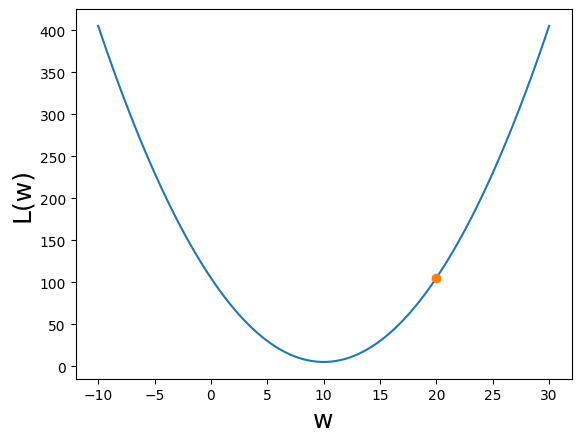

In [3]:
# PLOTTING FUNCTION (L is a function handle)
# PLOT THE FUNCTION IN THE NEIGHBORHOOD OF w_o
def plotter(w_o):
    # N=1000; wmin=w_o-3*w_o; wmax=w_o+3*w_o
    N=100; wmin=-10; wmax=30

    W = np.linspace(wmin,wmax,N)
    plt.figure() #INITIALIZE FIGURE 
    FS=18   #FONT SIZE
    plt.xlabel('w', fontsize=FS)
    plt.ylabel('L(w)', fontsize=FS)
    plt.plot(W,L1(W),'-')
    plt.plot(w_o,L1(w_o),'o')

#INITIAL GUESS FOR w VALUE OF MINIMUM
w_0=20

# EVALUATION
plotter(w_0)

FINAL GUESS: w_opt = [9.99999998]  L(w_opt) = [5.]


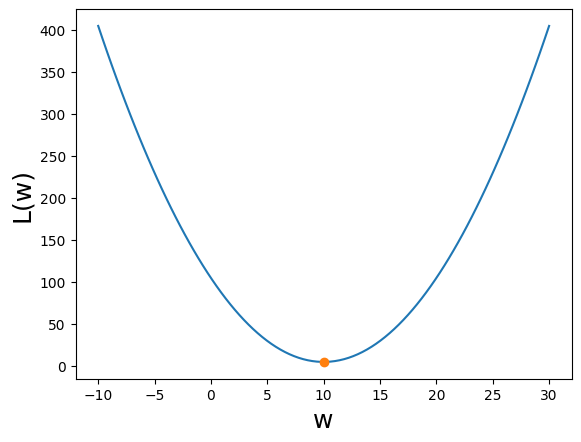

In [4]:
# RUN THE SCIPY MINIMIZER
res = minimize(L1, w_0, method='BFGS', tol=1e-15)
w_opt=res.x
print("FINAL GUESS: w_opt =",w_opt, " L(w_opt) =",L1(w_opt))
plotter(w_opt)

## Finite difference 
![](2023-01-22-18-23-14.png)

## Demo: Gradient descent 
* Here we will code Gradient descent for a function of a single variable
* As we saw in the lecture, it is a remarkably simple algorithm 
* It has only one hyper-parameter $\alpha$ (known as the learning rate)
$$w_{i+1}=w_{i}-\alpha \frac{dL}{dw}$$
* Clearly we need the derivative of the loss function  $L$ WRT to $w$ to apply the formula 
* We will approximate the derivative using the backwards finite difference formula 
  $$\frac{dL}{dw} \approx \frac {L(w)-L(w-\Delta w)}{\Delta w}$$
* Artificial Neural network training uses a more sophisticated method of gradient calculation, known as back-propagation. However the underlying fundamental concepts are the same. 



In [5]:
#PARAMETERS
LR=0.01								# LEARNING RATE (alpha)
imax=500							# MAX NUMBER OF STEPS
wi=20								# INITIAL GUESS
dw=0.0001							# STEP SIZE FOR FINITE DIFFERENCE CALCULATION
num_eval=0							# RESET COUNTER
tol=0.0001							# CONVERGENCE TOLERENCE

# OPTIMIZATION LOOP
i=0 	 
while(i<=imax):

	# EVALUATE OBJECTIVE FUNCTION
	Li=L1(wi)

	# COMPUTE GRADIENT
	dL_dw=(Li-L1(wi-dw))/(dw)

	# APPLY GRADIENT DECENT STEP
	wip1=wi-LR*dL_dw  
	
	# REPORT 
	if(i%25==0):
		print("step =",i,"    wi =",round(wi,2),"    Li =",round(Li,2),
			  "   |w_ip1-w_i|=",round(np.absolute(wip1-wi),6)) 

	# STOPPING CRITERION 
	if(np.absolute(wip1-wi)<tol):
		print("STOPPING CRITERION MET (STOPPING TRAINING)")
		break

	# UPDATE
	wi=wip1
	i=i+1


step = 0     wi = 20     Li = 105.0    |w_ip1-w_i|= 0.199999
step = 25     wi = 16.03     Li = 41.42    |w_ip1-w_i|= 0.120692
step = 50     wi = 13.64     Li = 18.26    |w_ip1-w_i|= 0.072834
step = 75     wi = 12.2     Li = 9.83    |w_ip1-w_i|= 0.043952
step = 100     wi = 11.33     Li = 6.76    |w_ip1-w_i|= 0.026524
step = 125     wi = 10.8     Li = 5.64    |w_ip1-w_i|= 0.016006
step = 150     wi = 10.48     Li = 5.23    |w_ip1-w_i|= 0.009659
step = 175     wi = 10.29     Li = 5.08    |w_ip1-w_i|= 0.005829
step = 200     wi = 10.18     Li = 5.03    |w_ip1-w_i|= 0.003518
step = 225     wi = 10.11     Li = 5.01    |w_ip1-w_i|= 0.002123
step = 250     wi = 10.06     Li = 5.0    |w_ip1-w_i|= 0.001281
step = 275     wi = 10.04     Li = 5.0    |w_ip1-w_i|= 0.000773
step = 300     wi = 10.02     Li = 5.0    |w_ip1-w_i|= 0.000466
step = 325     wi = 10.01     Li = 5.0    |w_ip1-w_i|= 0.000282
step = 350     wi = 10.01     Li = 5.0    |w_ip1-w_i|= 0.00017
step = 375     wi = 10.01     Li = 5.0

## Lab-1.1.1: Single variable secant method

* Copy the gradient descent code as a starting point
  
* Update the first derivative finite difference approximation from the backwards formula to the central formula (which is more accurate)
$$L'(w_i)=\frac{d L}{dw}\approx\frac{L(w_i+dw)-L(w_i-dw)}{2 dw}$$
* Convert Gradient descent to Newton's method with the derivatives estimated via finite difference (i.e. the secant method)
$$w_{i+1}=w_{i}-\frac{L'(w_i)}{L''(w_i)}$$
* Approximate the second derivative as 
$$L''(w_i)=\frac{d^2 L}{dw^2}\approx\frac{L(w_i+dw)-2.0L(w_i)+L(w_i-dw)}{dw^2}$$
* Delete the stopping criterion code and only run for 10 steps.
* If coded correctly it should converge to the minima within the first couple steps

In [6]:
# USE THE FOLLOWING PARAMETERS 
# NOTICE HOW EVEN THOUGH WE START FURTHER AWAY, 
# THE SECANT METHOD IS MUCH MUCH MORE EFFICIENT AT FINDING THE MINIMUM 

#PARAMETERS
wi=200	                            # INITIAL GUESS
imax=10                             # MAX NUMBER OF STEPS 
LR=0.01								# LEARNING RATE (alpha)
dw=0.0001							# STEP SIZE FOR FINITE DIFFERENCE CALCULATION
num_eval=0							# RESET COUNTER

# OPTIMIZATION LOOP
i=0 	 
while(i<=imax):

	# EVALUATE OBJECTIVE FUNCTION
	Li=L1(wi)

	# COMPUTE GRADIENT USING CENTRAL FORMULA
	dL_dw=(L1(wi + dw)-L1(wi-dw))/(2*dw)
	d2L_d2w = (L1(wi + dw) - 2*L1(wi) + L1(wi-dw))/(dw**2)

	# APPLY NEWTON'S METHOD
	wip1=wi-(dL_dw/d2L_d2w)
	
	# REPORT 
	print("step =",i,"    wi =",round(wi,2),"    Li =",round(Li,2),
			"   |w_ip1-w_i|=",round(np.absolute(wip1-wi),6)) 

	# UPDATE
	wi=wip1
	i=i+1


# INSERT CODE HERE


step = 0     wi = 200     Li = 36105.0    |w_ip1-w_i|= 190.053866
step = 1     wi = 9.95     Li = 5.0    |w_ip1-w_i|= 0.053866
step = 2     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 3     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 4     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 5     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 6     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 7     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 8     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 9     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0
step = 10     wi = 10.0     Li = 5.0    |w_ip1-w_i|= 0.0


## Example: Two dependent variables
* Now let's find the minimum using SciPy of a scalar field with two dependent variables. 
* i.e. find $(w_0,w_1)$ which minimize $L(w_0,w_1)$

In [7]:
# DEFINE FUNCTION
def L2(w_i):
    # (w0,w1) --> L TYPE OBJECTIVE FUNCTION
    return 4.343+(w_i[0]-3.14)**2.0+(w_i[1]-2.71)**2

# EXPECTED
print("EXPECTED ANSWER --> (w0,w1)=(3.14,2.71)  with L(3.14,2.71)=4.343")

# INITIAL GUESS 
w_0=np.array([0.1,0.1])
print("INITIAL GUESS: w_0 =",w_0)

# RUN MINIMIZER
res = minimize(L2, w_0, method='BFGS', tol=1e-15)

# PRINT RESULT
w_opt=res.x
print("NUMERICAL SOLUTION: w_opt =",w_opt)
print(" L(w_opt) =",L2(w_opt))

EXPECTED ANSWER --> (w0,w1)=(3.14,2.71)  with L(3.14,2.71)=4.343
INITIAL GUESS: w_0 = [0.1 0.1]
NUMERICAL SOLUTION: w_opt = [3.14 2.71]
 L(w_opt) = 4.343


## Lab-1.1.2: Visualize objective 

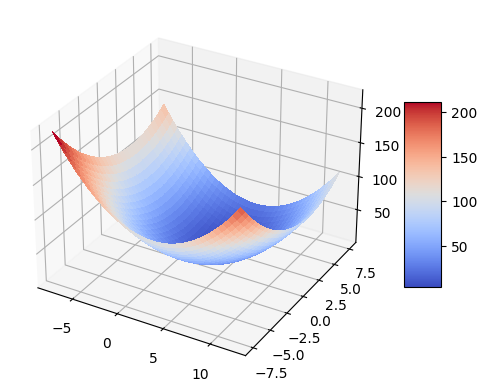

In [10]:
# INSERT CODE TO VISUALIZE THE TWO VARIABLE SCALAR FIELD AS A SURFACE PLOT
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-7.5, 12.5, 0.25)
Y = np.arange(-7.5, 7.75, 0.25)
X, Y = np.meshgrid(X, Y)
Z = L2([X,Y])

# Plot the surface.
surf = ax.plot_surface(X,Y, Z, cmap = matplotlib.cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Example: Four dependent variables
* Now let's find the minimum using SciPy of a scalar field with FOUR dependent variables. 

* i.e. find $(w_0,w_1,w_2,w_3)$ which minimize $L(w_0,w_1,w_2,w_3)$
* **Note:** There is no limit to the dimensionality, we could use the exact same procedure to minimize a scalar function of 501 variables $L(w_0,w_1, \dots, w_2,w_{500})$, it would just be slower 

In [9]:
# DEFINE FUNCTION
def L4(w_i):
    # (w0,w1,w2,w3) --> L TYPE OBJECTIVE FUNCTION
    return 8.343+(w_i[0]-3)**2.0+(w_i[1]-4)**2+(w_i[2]-10)**2+(w_i[3]-(-5))**2

# EXPECTED
print("EXPECTED ANSWER --> (w0,w1,w2,w3)=(3,4,10,-5)  with L((3,4,10,-5))=8.343")

# INITIAL GUESS 
w_0=np.array([0.1,0.1,0.1,0.1])
print("INITIAL GUESS: w_0 =",w_0)

# RUN MINIMIZER
res = minimize(L4, w_0, method='BFGS', tol=1e-15)

# PRINT RESULT
w_opt=res.x
print("NUMERICAL SOLUTION: w_opt =",w_opt)
print(" L(w_opt) =",L4(w_opt))

EXPECTED ANSWER --> (w0,w1,w2,w3)=(3,4,10,-5)  with L((3,4,10,-5))=8.343
INITIAL GUESS: w_0 = [0.1 0.1 0.1 0.1]
NUMERICAL SOLUTION: w_opt = [ 2.99999999  3.99999998 10.         -5.        ]
 L(w_opt) = 8.343


## Lab-1.1.3: multi-variable gradient decent - OPTIONAL

* In a function call `minimizer`
* Generalize the single variable gradient descent algorithm to the case of multiple variables 
* In this case the parameter $w_i$ becomes a vector $\mathbf w_i$ (i.e. a numpy array)
* This is also the case for the derivative, which becomes the gradient (another numpy array)
$$\mathbf \nabla L = \left(\frac{\partial L}{\partial w_0},\frac{\partial L}{\partial w_1} \dots \frac{\partial L}{\partial w_N}\right)$$
* Each term in the gradient can be calculated by keeping all variables constant, except one, and applying the finite difference formula. 
* For example, consider just two variables, and computing $\frac{\partial L}{\partial w_0}$
  * $\mathbf w_i=(w_{i,0},w_{i,1})$
  * The perturbation for $w_0$ is $\mathbf \Delta w_0=(\Delta w,0)$ and $\mathbf \Delta w_1=(0,\Delta w)$ for $w_1$
  * the component of the gradient would be $\frac{\partial L}{\partial w_0}\approx \frac{L(\mathbf w_i+\mathbf \Delta w_0)-L(\mathbf w_i-\mathbf \Delta w_0)}{2\Delta w}$
  * where $\Delta w$ is a small number (hyper-parameter)
* Your code should be fully general and work for a $\mathbf w$ of arbitrary dimension


In [10]:
def minimizer(l,wi):
    # INSERT YOUR CODE HERE


## Lab-1.1.4: Test-1

* Apply your code to the L2 objective function, your solutions should match those found with SciPy
  
* **Note:** This is just a name (loss function with 2 variables), it has nothing to do with L2 regularization which we will discuss later in the course.

In [ ]:
# INITIAL GUESS 
w_0=np.array([0.1,0.1])
print("INITIAL GUESS: w_0 =",w_0)

# RUN MINIMIZER
w_opt = minimizer(L2, w_0)

# PRINT RESULT
print("NUMERICAL SOLUTION: w_opt =",w_opt)
print(" L(w_opt) =",L2(w_opt))

## Lab-1.1.5: Test-2

* Apply your code to the L4 objective function, your solutions should match those found with SciPy

In [ ]:
# INITIAL GUESS 
w_0=np.array([0.1,0.1,0.1,0.1])
print("INITIAL GUESS: w_0 =",w_0)

# RUN MINIMIZER
w_opt = minimizer(L4, w_0)

# PRINT RESULT
print("NUMERICAL SOLUTION: w_opt =",w_opt)
print(" L(w_opt) =",L4(w_opt))